In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
df = pd.read_csv('SWaT_dataset_Jul_19_v2.csv')

/Users/guillaume/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,Unnamed: 0,P1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,P2,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,timestamp,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On met les bons noms de colones

In [6]:
df.columns = df.loc[0]

In [7]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,timestamp,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On supprime les lignes inutiles

In [8]:
df = df.drop([0,1], axis=0)

In [9]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
5,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
6,2019-07-20T04:30:04Z,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


Mise a jour des index

In [10]:
df.reset_index(inplace=True, drop=True)

In [11]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:04Z,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On modifie le nom de la colone temps

In [12]:
df = df.rename(columns={"GMT +0":"timestamp"})

On modifie cette colone en ne gardant que l'heure, les minutes et les secondes et on stocke sous format timedelta

!! A voir si il faut pas garder aussi les millisecondes et les micro secondes !!

In [13]:
import re
from datetime import timedelta

In [14]:
date_pattern = '[0-9]{2}:[0-9]{2}:[0-9]*'
i=0
for date in df['timestamp']:
    hour = re.findall(date_pattern, date)
    h = str(hour)[2:10]
    n = h.split(':')
    df['timestamp'][i] = timedelta(hours=int(n[0]), minutes=int(n[1]), seconds=int(n[2]))
    i+=1

In [15]:
df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,4:30:00,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,4:30:01,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,4:30:02,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,4:30:03,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,4:30:04,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


On creer les colones qui serviront pour labeliser les attaques
Pour l'instant que des 0

In [16]:
df['FIT401_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['LIT301_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P601_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MultiPoint_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MV501_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P301_attack'] = pd.Series(np.zeros(len(df)).astype(int))

In [17]:
df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,P6 STATE,P601 Status,P602 Status,P603 Status,FIT401_attack,LIT301_attack,P601_attack,MultiPoint_attack,MV501_attack,P301_attack
0,4:30:00,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,2,1,1,1,0,0,0,0,0,0
1,4:30:01,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,2,1,1,1,0,0,0,0,0,0
2,4:30:02,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,2,1,1,1,0,0,0,0,0,0
3,4:30:03,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,2,1,1,1,0,0,0,0,0,0
4,4:30:04,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,2,1,1,1,0,0,0,0,0,0


### - Labelisation des données representant les 6 attaques

On déclare les debuts et fins des differentes attaques
A noter que les heures indiqué dans le pdf expliquant le déroulement des attaques sont à GMT +8 de celles du csv

In [18]:
deb_FIT401 = timedelta(hours=7, minutes=8, seconds=46)
fin_FIT401 = timedelta(hours=7, minutes=10, seconds=31)

deb_LIT301 = timedelta(hours=7, minutes=15, seconds=0)
fin_LIT301 = timedelta(hours=7, minutes=19, seconds=32)

deb_P601 = timedelta(hours=7, minutes=26, seconds=57)
fin_P601 = timedelta(hours=7, minutes=30, seconds=48)

deb_MultiPoint = timedelta(hours=7, minutes=38, seconds=50)
fin_MultiPoint = timedelta(hours=7, minutes=46, seconds=20)

deb_MV501 = timedelta(hours=7, minutes=54, seconds=0)
fin_MV501 = timedelta(hours=7, minutes=56, seconds=0)

deb_P301 = timedelta(hours=8, minutes=2, seconds=56)
fin_P301 = timedelta(hours=8, minutes=16, seconds=18)

Parcourt du dataframe pour labeliser les données selon les attaques

In [19]:
i = 0
for date in df['timestamp']:
    if(date > deb_FIT401 and date < fin_FIT401):
        df['FIT401_attack'][i] = 1
    if(date > deb_LIT301 and date < fin_LIT301):
        df['LIT301_attack'][i] = 1
    if(date > deb_P601 and date < fin_P601):
        df['P601_attack'][i] = 1
    if(date > deb_MultiPoint and date < fin_MultiPoint):
        df['MultiPoint_attack'][i] = 1
    if(date > deb_MV501 and date < fin_MV501):
        df['MV501_attack'][i] = 1
    if(date > deb_P301 and date < fin_P301):
        df['P301_attack'][i] = 1

    i += 1

<ipython-input-19-b9ef0f40c976>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIT401_attack'][i] = 1
<ipython-input-19-b9ef0f40c976>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIT301_attack'][i] = 1
<ipython-input-19-b9ef0f40c976>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P601_attack'][i] = 1
<ipython-input-19-b9ef0f40c976>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [20]:
print("Nombre de données avec attaque sur FIT401 : " + str(len(df.loc[df['FIT401_attack'] == 1])))
print("Nombre de données avec attaque sur LIT301 : " + str(len(df.loc[df['LIT301_attack'] == 1])))
print("Nombre de données avec attaque sur P601 : " + str(len(df.loc[df['P601_attack'] == 1])))
print("Nombre de données avec attaque multi point : " + str(len(df.loc[df['MultiPoint_attack'] == 1])))
print("Nombre de données avec attaque sur MV501 : " + str(len(df.loc[df['MV501_attack'] == 1])))
print("Nombre de données avec attaque sur P301 : " + str(len(df.loc[df['P301_attack'] == 1])))

Nombre de données avec attaque sur FIT401 : 104
Nombre de données avec attaque sur LIT301 : 271
Nombre de données avec attaque sur P601 : 230
Nombre de données avec attaque multi point : 449
Nombre de données avec attaque sur MV501 : 119
Nombre de données avec attaque sur P301 : 801


# A faire :

## - Etudier les données comme dans tp1 et tp2 (min, max, ...)
## - Appliquer un premier algo d'analyse

## Data Observation

In [21]:
#Nombr de colonnes
nbCols = len(df.columns)
print("Nombre de colonnes dans le dataset: " + str(nbCols))

Nombre de colonnes dans le dataset: 84


In [22]:
#Noms des colonnes et leurs types
for i in df.columns:
  print(i + ", type: " + str(df.dtypes[i]))

timestamp, type: object
FIT 101, type: object
LIT 101, type: object
MV 101, type: object
P1_STATE, type: object
P101 Status, type: object
P102 Status, type: object
AIT 201, type: object
AIT 202, type: object
AIT 203, type: object
FIT 201, type: object
LS 201, type: object
LS 202, type: object
LSL 203, type: object
LSLL 203, type: object
MV201, type: object
P2_STATE, type: object
P201 Status, type: object
P202 Status, type: object
P203 Status, type: object
P204 Status, type: object
P205 Status, type: object
P206 Status, type: object
P207 Status, type: object
P208 Status, type: object
AIT 301, type: object
AIT 302, type: object
AIT 303, type: object
DPIT 301, type: object
FIT 301, type: object
LIT 301, type: object
MV 301, type: object
MV 302, type: object
MV 303, type: object
MV 304, type: object
P3_STATE, type: object
P301 Status, type: object
P302 Status, type: object
AIT 401, type: object
AIT 402, type: object
FIT 401, type: object
LIT 401, type: object
LS 401, type: object
P4_STATE,

In [23]:
#Taille du dataset
print("La taille du dataset est: " + str(len(df)))

La taille du dataset est: 14996


In [41]:
#Quelles sont les attributs catégoriques?
#Dans le jeu de données original, toutes les colonnes avaient le type 'object'
#Mais en examinant les differentes valeurs possibls dans chacune des colonnes
#il nous semble que certaines colonnes sont bien catégoriques mais qu'il en 
#existe qui son catégoriques

#Liste de colonnes qui nous semblent être catégoriques
fake_cat_list = ['MV 101','P1_STATE','P101 Status','P102 Status',\
            'MV201','P2_STATE','P201 Status','P202 Status',\
            'P203 Status','P204 Status','P205 Status','P206 Status','P207 Status',\
            'P208 Status','MV 301','MV 302','MV 303','MV 304','P3_STATE',\
            'P301 Status','P302 Status','P4_STATE','P401 Status',\
            'P402 Status','P403 Status','P404 Status','UV401','MV 501','MV 502',\
            'MV 503','MV 504','P5_STATE','P501 Status','P502 Status','P6 STATE',\
            'P601 Status','P602 Status','P603 Status','FIT401_attack',\
            'LIT301_attack','P601_attack','MultiPoint_attack','MV501_attack',\
            'P301_attack']

real_cat_list = ['LS 201', 'LS 202', 'LSL 203', 'LSLL 203', 'LS 401',\
                 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601', 'LSL 602', 'LSL 603']

#Liste de colonnes numériques
num_list = list(set(list(df.columns)) - set(fake_cat_list) - set(real_cat_list))

#On enleve de la liste de colonnes numériques la colonne décrivant le temps
num_list.remove('timestamp')

In [42]:
#Pour chaque colonne catégorique on affiche les valeurs possibles
for cat in fake_cat_list:
    i=0
    df[cat] = df[cat].astype(int)

In [43]:
#Ensuite pour les colonnes numériques nous aimerions afficher pour chaque 
#colonne, le minmum, le maximum, la moyenne, la mediane et l'ecart-type.
#Pour faire cela, nous devons d'abord changer le type de la colonne en float

for i in num_list:
    df[i] = df[i].astype(float)

for i in num_list:
    print(df[i].describe())

count    14996.000000
mean         0.798153
std          0.033274
min          0.457703
25%          0.799539
50%          0.801589
75%          0.802871
max          0.827736
Name: FIT 501, dtype: float64
count    14996.000000
mean         0.740876
std          1.634632
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.403484
Name: FIT 101, dtype: float64
count    14996.000000
mean       886.224353
std         63.100612
min        756.921300
25%        832.132800
50%        881.274048
75%        940.230069
max       1003.550350
Name: LIT 401, dtype: float64
count    14996.000000
mean        25.231166
std          1.862370
min         23.647783
25%         24.609074
50%         24.839785
75%         25.032044
max         47.103306
Name: AIT 504, dtype: float64
count    14996.000000
mean         0.794251
std          0.040510
min          0.462386
25%          0.797746
50%          0.799411
75%          0.801972
max          0.818490


In [44]:
#On vérifie s'il y a des NaN dans les colonnes pour eventuellement les éliminer.
#Mais comme nous pouvons voir, il n'y en a pas
nan = False
cols = list(df.columns)
for i in cols:
    nan_number = df[i].isna().sum()
    if (nan_number > 0):
        print(str((nan_number/df.shape[0])*100)+'%')
        nan = True
        
if (nan == False):
    print('Il n\'y a pas de données manquantes')

Il n'y a pas de données manquantes


## Matrice de correlation

### Pour les données pré-attaques
# MARCHE PAS !!!!!!

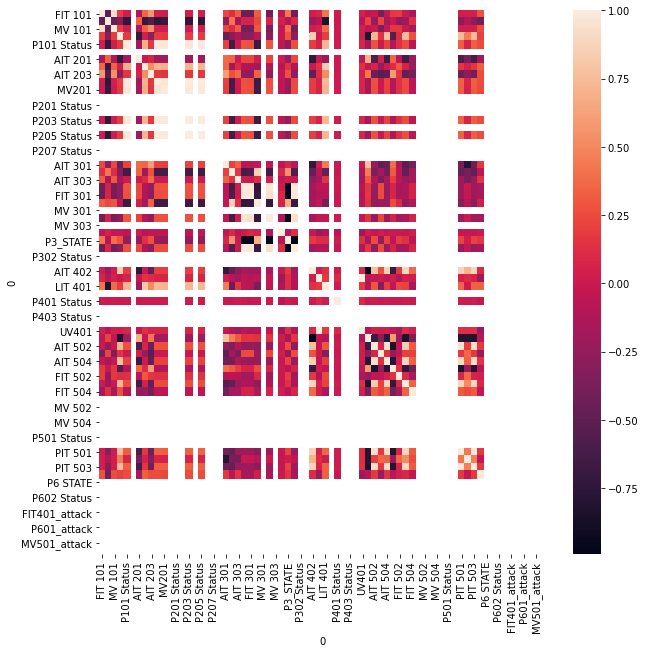

In [47]:
pre_attack = df.loc[df['timestamp'] < deb_FIT401]

pre_attack_correlation_mat = pre_attack.corr()
plt.figure(figsize=(10,10))
sns.heatmap(pre_attack_correlation_mat)

plt.show()